In [109]:
# import lib/packages
import numpy as np
import pandas as pd

In [110]:
# import dataset
dataset = pd.read_csv("SMSSpamCollection", sep='\t', names=['label','message'])

In [111]:
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [113]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [114]:
dataset['label'] = dataset['label'].map({'ham':0 , 'spam':1})

In [115]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

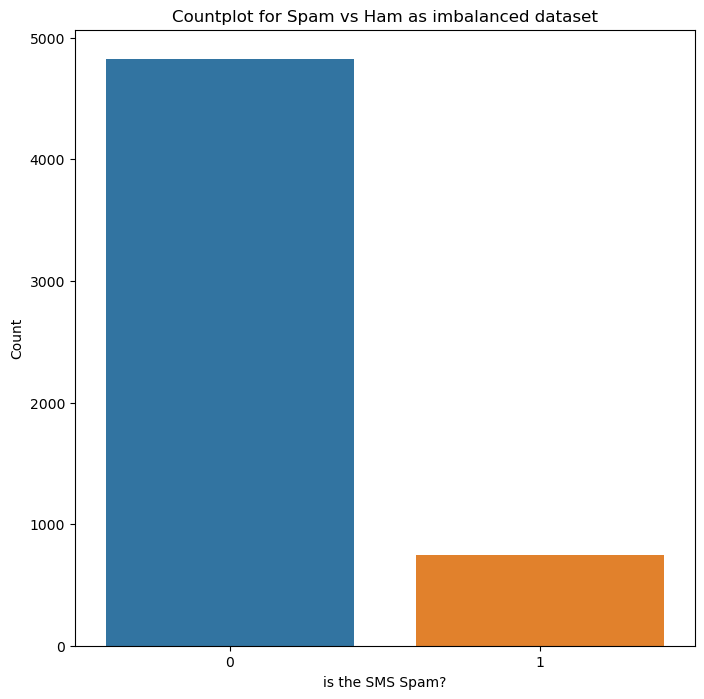

In [117]:
# count for spam vs ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x="label",data=dataset)
p = plt.title('Countplot for Spam vs Ham as imbalanced dataset')
p = plt.xlabel('is the SMS Spam?')
p = plt.ylabel('Count')

In [118]:
# Handling imbalanced dataset using oversampling 
only_spam = dataset[dataset["label"] == 1]

In [119]:
only_spam


,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [120]:
print('No of Spam SMS:', len(dataset))
print('No of Ham SMS:', len(dataset)-len(only_spam))

No of Spam SMS: 5572
No of Ham SMS: 4825


In [121]:
count = int((dataset.shape[0] - only_spam.shape[0]) / only_spam.shape[0])

In [122]:
count

6

In [123]:
for i in range(0,count-1):
    dataset = pd.concat([dataset,only_spam])
    
dataset.shape

(9307, 2)

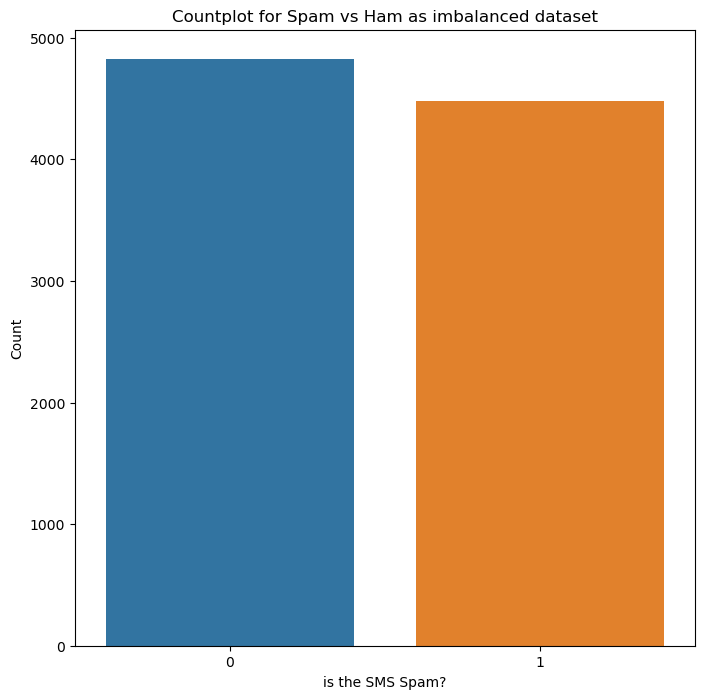

In [124]:
# count for spam vs ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x="label",data=dataset)
p = plt.title('Countplot for Spam vs Ham as imbalanced dataset')
p = plt.xlabel('is the SMS Spam?')
p = plt.ylabel('Count')

In [125]:
# creating new feature word_count
dataset['word_count'] = dataset['message'].apply(lambda x: len(x.split()))

In [126]:
dataset

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


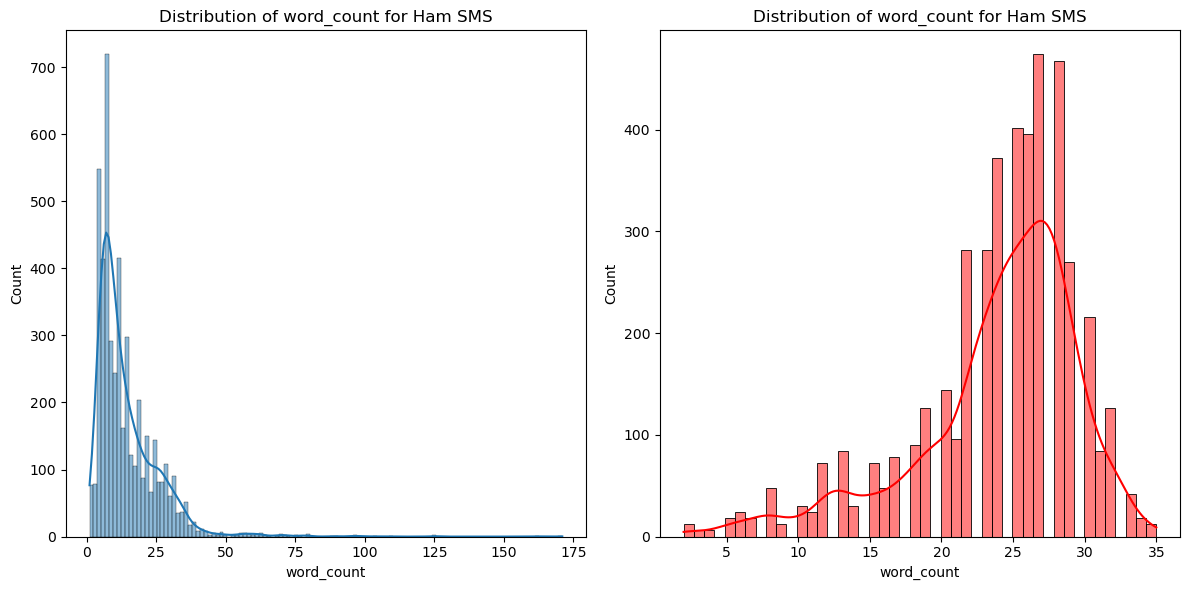

In [127]:
plt.figure(figsize=(12,6))

# (1,1)
plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset["label"] == 0].word_count, kde=True)
p = plt.title('Distribution of word_count for Ham SMS')

# (1,2)
plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset["label"] == 1].word_count, color="red", kde=True)
p = plt.title('Distribution of word_count for Ham SMS')

plt.tight_layout()
plt.show()


In [128]:
# creating new feature of containing currency symbols
def currency(data):
    currency_symbols = ['$','₹','₽','£','Є','¥']
    for i in currency_symbols:
        if i in data:
            return 1
        return 0
    
    

In [129]:
dataset["contains_currency_symbol"] = dataset["message"].apply(currency)

In [130]:
dataset

,label,message,word_count,contains_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,0
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


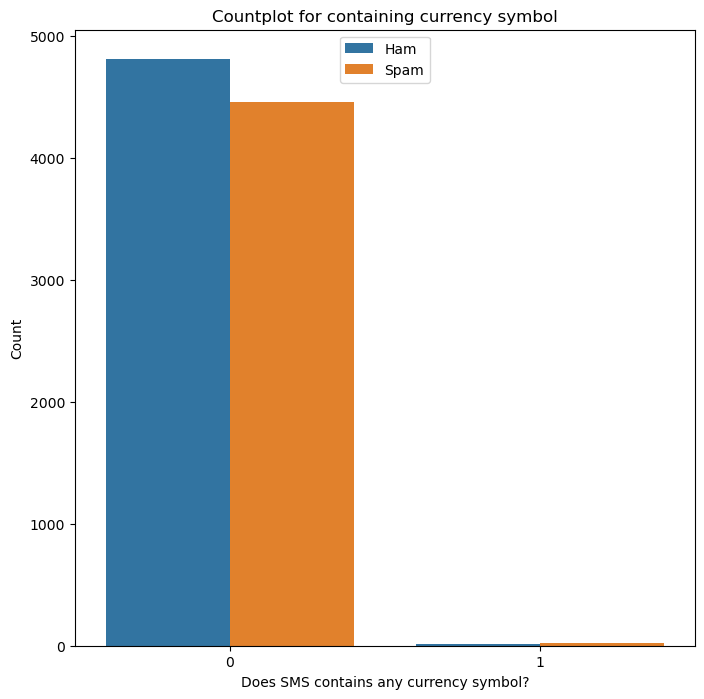

In [131]:
# countppt for contains_currency_symbols
plt.figure(figsize=(8,8))
g = sns.countplot(x = 'contains_currency_symbol',data=dataset,hue = "label")
p = plt.title('Countplot for containing currency symbol')
p = plt.xlabel('Does SMS contains any currency symbol?')
p = plt.ylabel('Count')
p = plt.legend(labels = ["Ham","Spam"],loc = 9)

In [132]:
# creating new feature of containing numbers
def number(data):
    for i in data:
        if ord(i)>= 40 and ord(i) <= 57:
            return 1
        return 0
    
        

In [133]:
dataset["contains_number"] = dataset["message"].apply(number)

In [134]:
dataset

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,0
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,0,0
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,0


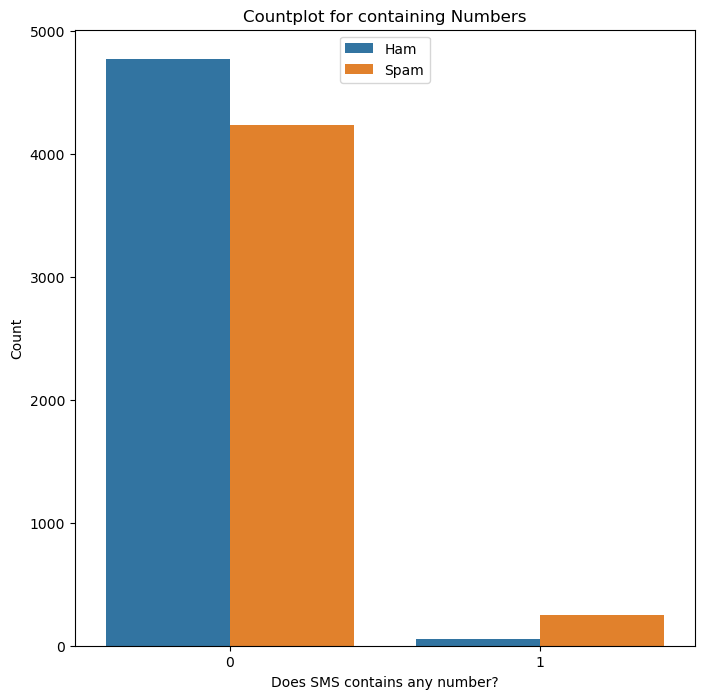

In [135]:
# countplot for containing matters
plt.figure(figsize=(8,8))
g = sns.countplot(x = 'contains_number',data=dataset,hue = "label")
p = plt.title('Countplot for containing Numbers')
p = plt.xlabel('Does SMS contains any number?')
p = plt.ylabel('Count')
p = plt.legend(labels = ["Ham","Spam"],loc = 9)

In [136]:
# Data Cleaning 
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [137]:
corpus = []
wnl = WordNetLemmatizer()

for sns in list(dataset.message):
    message = re.sub(pattern = '[^a-zA-Z]',repl= ' ',string=sns) # filtering out special characters and numbers
    message = message.lower()
    words = message.split() # Tokenizer
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in message]
    message = ''.join(message)
    
    corpus.append(message)

In [138]:
corpus

['go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   ',
 'ok lar    joking wif u oni   ',
 'free entry in   a wkly comp to win fa cup final tkts   st may       text fa to       to receive entry question std txt rate t c s apply            over   s',
 'u dun say so early hor    u c already then say   ',
 'nah i don t think he goes to usf  he lives around here though',
 'freemsg hey there darling it s been   week s now and no word back  i d like some fun you up for it still  tb ok  xxx std chgs to send        to rcv',
 'even my brother is not like to speak with me  they treat me like aids patent ',
 'as per your request  melle melle  oru minnaminunginte nurungu vettam   has been set as your callertune for all callers  press    to copy your friends callertune',
 'winner   as a valued network customer you have been selected to receivea      prize reward  to claim call              claim code kl     valid    hours only ',
 'had you

In [139]:
# creating the bag of words model 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [140]:
x = pd.DataFrame(vectors, columns = feature_names)
y = dataset['label']

In [141]:
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.metrics import classification_report , confusion_matrix

In [142]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [143]:
x_train

,about,ac,account,admirer,after,again,age,all,already,also,...,yeah,year,years,yes,yet,yo,you,your,yours,yr
3533,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2592,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4253,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.323869,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6976,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7191,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.098326,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.110796,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [144]:
# naive Bayes model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb , x , y , scoring='f1',cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.949
0.006


In [145]:
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)

In [146]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       959
           1       0.96      0.94      0.95       903

    accuracy                           0.95      1862
   macro avg       0.95      0.95      0.95      1862
weighted avg       0.95      0.95      0.95      1862



In [151]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[928,  31],
       [ 57, 846]], dtype=int64)

In [177]:
plt.figure(figsize=(8,8))
axis_labels = ['ham','spam']
g = sns.heatmap(data=cm, xticklabels=axis_labels,yticklabels=axis_labels, annot = True , fmt='g', cbar_kws={"shrink": 0.5})
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel("Actual values")
p = plt.ylabel("Predicted values")

AttributeError: 'str' object has no attribute 'heatmap'

<Figure size 800x800 with 0 Axes>

In [180]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt , x , y , scoring='f1' , cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))


0.982
0.003


In [185]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       959
           1       0.96      0.94      0.95       903

    accuracy                           0.95      1862
   macro avg       0.95      0.95      0.95      1862
weighted avg       0.95      0.95      0.95      1862



In [186]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[928,  31],
       [ 57, 846]], dtype=int64)

In [187]:
plt.figure(figsize=(8,8))
axis_labels = ['ham','spam']
g = sns.heatmap(data=cm, xticklabels=axis_labels,yticklabels=axis_labels, annot = True , fmt='g', cbar_kws={"shrink": 0.5})
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel("Actual values")
p = plt.ylabel("Predicted values")

AttributeError: 'str' object has no attribute 'heatmap'

<Figure size 800x800 with 0 Axes>

In [191]:
def predict_spam(msms):
    message = re.sub(pattern = '[^a-zA-Z]',repl= ' ',string=sns) # filtering out special characters and numbers
    message = message.lower()
    words = message.split() # Tokenizer
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in message]
    message = ''.join(lemm_words)
    temp = tfidf.transforms([message]).toarray()
    return mnb.predict(temp)
 